<a href="https://colab.research.google.com/github/Afrigers/ASSIGNMENT/blob/master/Online_Booking_Orders_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [54]:
festman_data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/festman_hotel.xlsx")


### DATA EXPLORATION

``` 

In [56]:
festman_data.head(10)

,Booking ID,Date of Booking,Year,Time,Customer ID,Gender,Age,Origin Country,State,Location,...,Hotel Name,Hotel Rating,Payment Mode,Bank Name,No. Of Days.1,Rooms.1,Booking Price[SGD],Discount,GST,Profit Margin
0,DDMY00001,2010-01-01,2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,...,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),8,1,243,0.01,0.07,0.25
1,DDID00002,2010-01-01,2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,...,Enchanted Isle,4.2,Wallet,EZ-Link,1,2,312,0.00,0.07,0.24
2,DDSG00003,2010-01-01,2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,...,Seacoast Hotel,4.5,Credit Card,Grab,7,2,338,0.19,0.07,0.20
3,DDSG00004,2010-01-01,2010,13:44:40,SG00002,Male,28,Singapore,North,Yishun,...,Night In Paradise,4.2,Debit Card,DBS Paylah,4,2,254,0.19,0.07,0.13
4,DDKH00005,2010-01-01,2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,...,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),3,3,313,0.15,0.07,0.17
5,DDTH00006,2010-01-01,2010,05:41:55,TH00001,Male,32,Thailand,Chiang Mai,Chiang Mai,...,Seascape,4.5,Internet Banking,United Overseas Bank (UOB),1,1,161,0.01,0.07,0.15
6,DDTH00007,2010-01-01,2010,20:14:21,TH00002,Male,49,Thailand,Surat Thani,Surat Thani,...,Waldorf Astoria,4.6,Debit Card,HSBC,3,2,313,0.10,0.07,0.17
7,DDMY00008,2010-01-01,2010,00:22:07,MY00002,Female,58,Malaysia,Sarawak,Kuching,...,The Westgate Hotel,4.1,Wallet,Cash,1,2,121,0.05,0.07,0.15
8,DDSG00009,2010-01-01,2010,09:30:32,SG00003,Male,57,Singapore,North,Mandai,...,Firefly Motel,4.4,COD,EZ-Link,3,2,173,0.20,0.07,0.22
9,DDSG00010,2010-01-01,2010,16:22:39,SG00004,Female,41,Singapore,West,Tengah,...,Cape Grace,4.7,Credit Card,Grab,2,2,309,0.16,0.07,0.25


In [57]:
festman_data.describe()

,Year,Age,No. Of People,No. Of Days,Rooms,Hotel Rating,No. Of Days.1,Rooms.1,Booking Price[SGD],Discount,GST,Profit Margin
count,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,6.653500e+04,66535.000000
mean,2015.132396,38.436402,3.995852,3.233787,2.283400,4.288508,3.233787,2.283400,214.054212,0.125473,7.000000e-02,0.188815
std,2.885649,11.556566,2.000116,3.377939,1.031154,0.275520,3.377939,1.031154,108.127280,0.075115,4.163368e-17,0.052766
min,2010.000000,19.000000,1.000000,1.000000,1.000000,3.300000,1.000000,1.000000,35.000000,0.000000,7.000000e-02,0.100000
25%,2013.000000,28.000000,2.000000,1.000000,1.000000,4.200000,1.000000,1.000000,125.000000,0.060000,7.000000e-02,0.140000
50%,2015.000000,38.000000,4.000000,2.000000,2.000000,4.300000,2.000000,2.000000,199.000000,0.130000,7.000000e-02,0.200000
75%,2018.000000,48.000000,6.000000,4.000000,3.000000,4.500000,4.000000,3.000000,293.000000,0.190000,7.000000e-02,0.230000
max,2019.000000,58.000000,7.000000,97.000000,4.000000,4.700000,97.000000,4.000000,578.000000,0.250000,7.000000e-02,0.300000


In [58]:
festman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66535 entries, 0 to 66534
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Booking ID           66535 non-null  object        
 1   Date of Booking      66535 non-null  datetime64[ns]
 2   Year                 66535 non-null  int64         
 3   Time                 66535 non-null  object        
 4   Customer ID          66535 non-null  object        
 5   Gender               66535 non-null  object        
 6   Age                  66535 non-null  int64         
 7   Origin Country       66535 non-null  object        
 8   State                66535 non-null  object        
 9   Location             66535 non-null  object        
 10  Destination Country  66535 non-null  object        
 11  Destination City     66535 non-null  object        
 12  No. Of People        66535 non-null  int64         
 13  Check-in date        66535 non-

**DATA ANALYSIS**



### Top destination by customers


In [11]:
festman_data.groupby("Destination Country")["Destination City"].count()

Destination Country
Brazil         3241
Canada         3331
China          3391
Colombia       3408
Denmark        3375
Egypt          3422
France         3346
Germany        3300
Iceland        3344
India          3290
Iran           3172
Ireland        3316
Israel         3356
Italy          3340
Japan          3255
Kenya          3233
Maldives       3265
Mexico         3257
Nepal          3446
New Zealand    3447
Name: Destination City, dtype: int64

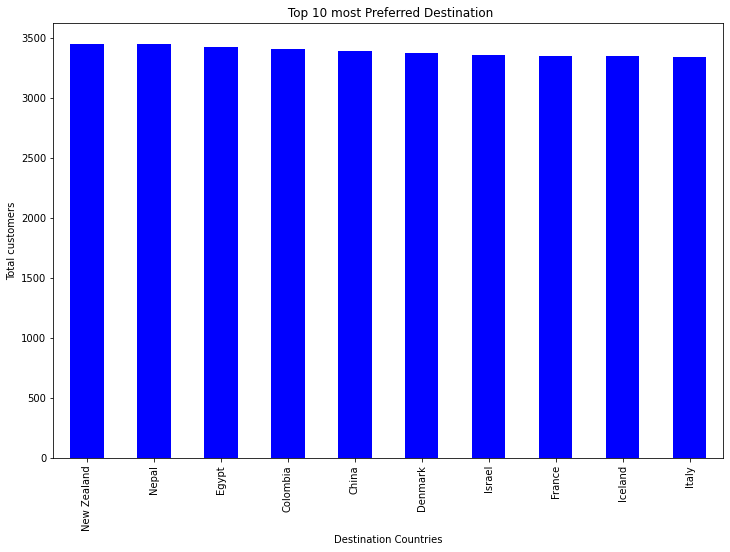

<Figure size 720x360 with 0 Axes>

In [89]:
### Top 10  Location preffered by Festman Customers
ten_locations=festman_data.groupby("Destination Country")["Destination City"].count().sort_values(ascending=False).head(10)
ten_locations.plot(kind="bar", color="b",figsize=(12,8), xlabel="Destination Countries", ylabel="Total customers", title=" Top 10 most Preferred Destination")
plt.figure(figsize=(10,5))
plt.show()

The top most preferred destination for our customers are New Zealand , Nepal, Egypt, Colombia and China Respectively with a total of 3447,3446,3442,3408 and 3391 customers respectively.

 **Customer Demographics by Gender.**

 

In [75]:
gender=festman_data.groupby("Gender")["Customer ID"].count()
gender

Gender
Female    33387
Male      33148
Name: Customer ID, dtype: int64

Plotting of total customers by Gender

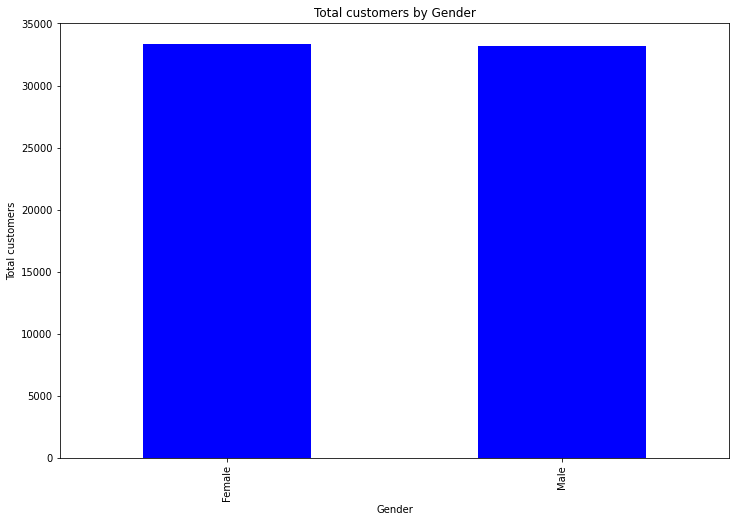

In [110]:
gender.plot(kind="bar", figsize=(12,8),color="b", ylabel="Total customers", xlabel="Gender", title="Total customers by Gender")
plt.show()

Customer Demographics by age group

In [98]:
# let fd represents festman_data
fd=festman_data

In [99]:
Values=["19-29","30-39","40-49","50-59"]
conditions=[
    (fd["Age"]<=29), 
    (fd["Age"]>29) & (fd["Age"]<=39),
    (fd["Age"]>39) & (fd["Age"]<=49),
    (fd["Age"]>49)
]

In [100]:
fd["Age Group"]=np.select(conditions,Values)

In [97]:
fd.head()

,Booking ID,Date of Booking,Year,Time,Customer ID,Gender,Age,Origin Country,State,Location,...,Hotel Rating,Payment Mode,Bank Name,No. Of Days.1,Rooms.1,Booking Price[SGD],Discount,GST,Profit Margin,Age Group
0,DDMY00001,2010-01-01,2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,...,4.3,Wallet,United Overseas Bank (UOB),8,1,243,0.01,0.07,0.25,40-49
1,DDID00002,2010-01-01,2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,...,4.2,Wallet,EZ-Link,1,2,312,0.00,0.07,0.24,40-49
2,DDSG00003,2010-01-01,2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,...,4.5,Credit Card,Grab,7,2,338,0.19,0.07,0.20,30-39
3,DDSG00004,2010-01-01,2010,13:44:40,SG00002,Male,28,Singapore,North,Yishun,...,4.2,Debit Card,DBS Paylah,4,2,254,0.19,0.07,0.13,19-29
4,DDKH00005,2010-01-01,2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,...,4.6,Wallet,Bank of Singapore (BOS),3,3,313,0.15,0.07,0.17,40-49


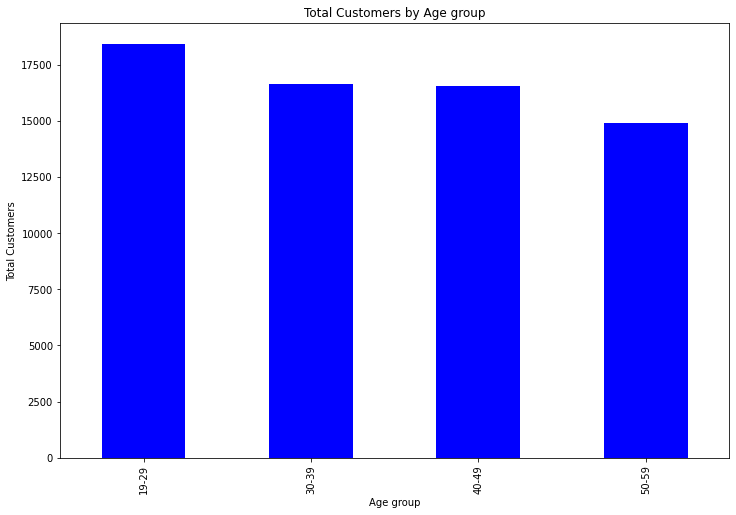

In [103]:
age_grp=fd.groupby("Age Group")["Customer ID"].count()
age_grp.plot(kind="bar", figsize=(12,8), color="b", xlabel="Age group", ylabel="Total Customers", title="Total Customers by Age group")
plt.show()

Customers Demographics by Location

In [81]:
location=festman_data.groupby("Location")["Customer ID"].count().sort_values(ascending=False).head(5)
location

Location
Jakarta      3519
West Java    1521
Papua        1458
Kuching       984
Ipoh          978
Name: Customer ID, dtype: int64

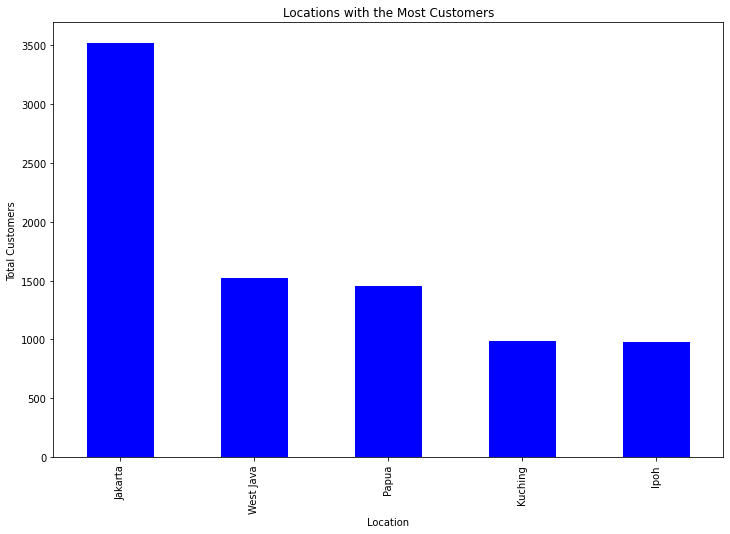

In [91]:
location.plot(kind="bar", figsize=(12,8), color="b", xlabel="Location", ylabel="Total Customers", title="Locations with the Most Customers")
plt.show()

Most customers are located in Jakarta, West Java, Papua, Kuching and Ipoh

Top Hotels by Booking

In [31]:
top_hotels_booking=festman_data.groupby("Hotel Name")["Booking ID"].count().sort_values(ascending=False).head()
top_hotels_booking

Hotel Name
Grand Hyatt         221
Secret Mirage       146
Enchanted Isle      146
Ace Hotel           146
Inn It To Win It    141
Name: Booking ID, dtype: int64

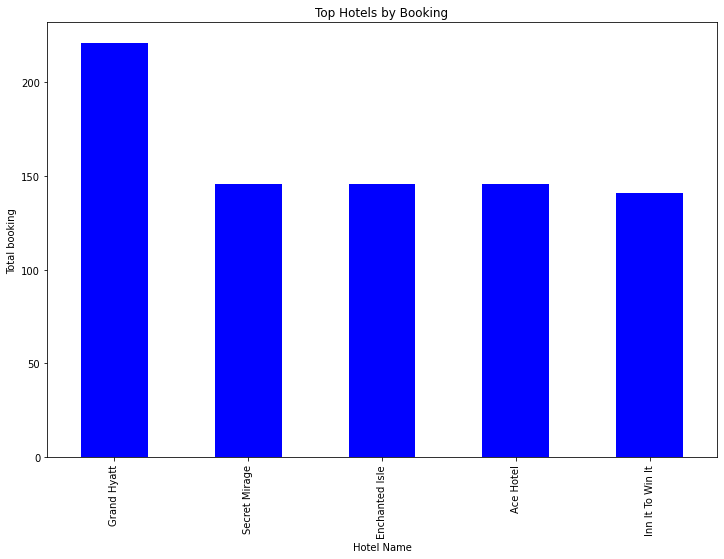

In [106]:
top_hotels_booking.plot(kind="bar", figsize=(12,8), color="b", xlabel="Hotel Name", ylabel="Total booking", title="Top Hotels by Booking")
plt.show()

The Top Hotels by Booking are Grand Hyatt, Secret Mirage, Enchanted Isle, Ace Hotel and Inn It to Win It

Top Hotels by rating

In [84]:
top_hotels_rating=festman_data.groupby("Hotel Name")["Hotel Rating"].mean().sort_values(ascending=False).head(5)
top_hotels_rating

Hotel Name
Silver Sun Bed And Breakfast        4.372727
Waldorf Astoria Hotels & Resorts    4.357000
Moonlight Motel                     4.353125
The Maxwell                         4.352252
Jack Summer Inn                     4.350549
Name: Hotel Rating, dtype: float64

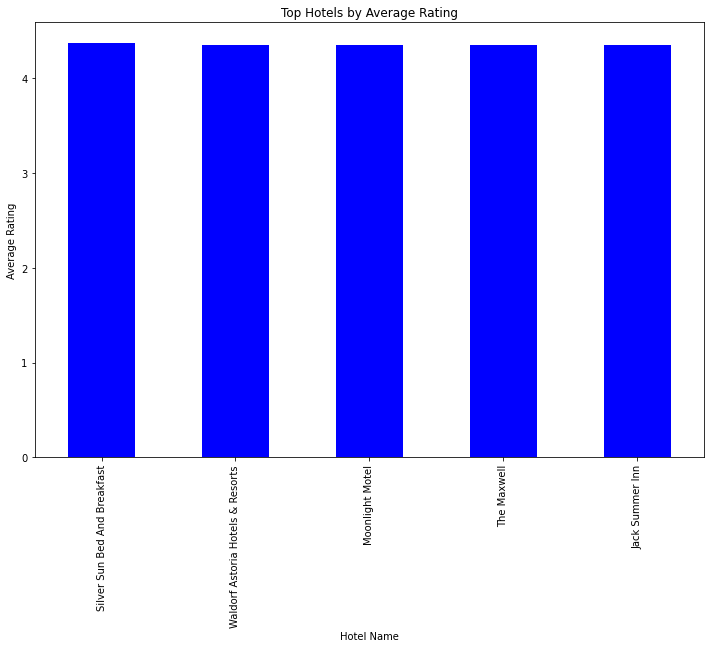

In [88]:
top_hotels_rating.plot(kind="bar", color="b", xlabel="Hotel Name",figsize=(12,8), ylabel="Average Rating", title="Top Hotels by Average Rating")
plt.show()

The Top Hotels by average ratings are Silver Sun Bed and Breakfast, Waldorf Astonia Hotels & resorts, Moonlight Motel, The Maxwell and Jack Summer Inn